<a href="https://colab.research.google.com/github/sandeep92134/The-Data-Science-Workshop-By-Packt/blob/master/module%208/Exercise8.2%3A%20Grid%20Search%20Hyperparameter%20Tuning%20for%20an%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets, svm, model_selection

In [2]:
# load data
digits = datasets.load_digits()

# target
y = digits.target

# features
X = digits.data

In [3]:
# support vector machine classifier
clr = svm.SVC(gamma='scale')

In [4]:
# hyperparameter grid. contains linear and polynomial kernels
grid = [
  {'kernel': ['linear']},
  {'kernel': ['poly'], 'degree': [2, 3, 4]}
 ]

In [5]:
# setting up the grid search to score on accuracy and evaluate over 10 folds
cv_spec = model_selection.GridSearchCV(estimator=clr, param_grid=grid, scoring='accuracy', cv=10)

In [6]:
# start the grid search
cv_spec.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [7]:
# what is the available information
print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [8]:
cv_spec.cv_results_

{'mean_fit_time': array([0.04787729, 0.05732846, 0.05814536, 0.06081934]),
 'mean_score_time': array([0.00614762, 0.00815084, 0.00759757, 0.00792894]),
 'mean_test_score': array([0.96048727, 0.97049969, 0.97773433, 0.97328367]),
 'param_degree': masked_array(data=[--, 2, 3, 4],
              mask=[ True, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'poly', 'poly'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear'},
  {'degree': 2, 'kernel': 'poly'},
  {'degree': 3, 'kernel': 'poly'},
  {'degree': 4, 'kernel': 'poly'}],
 'rank_test_score': array([4, 3, 1, 2], dtype=int32),
 'split0_test_score': array([0.93888889, 0.95      , 0.96111111, 0.96111111]),
 'split1_test_score': array([0.99444444, 0.99444444, 1.        , 1.        ]),
 'split2_test_score': array([0.93333333, 0.92222222, 0.93333333, 0.92222222]),
 'split3_test_sco

In [9]:
import pandas as pd

# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(cv_spec.cv_results_)

print(
# show the hyperparameterizations
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False)
)

                            params  mean_test_score
2  {'degree': 3, 'kernel': 'poly'}         0.977734
3  {'degree': 4, 'kernel': 'poly'}         0.973284
1  {'degree': 2, 'kernel': 'poly'}         0.970500
0             {'kernel': 'linear'}         0.960487


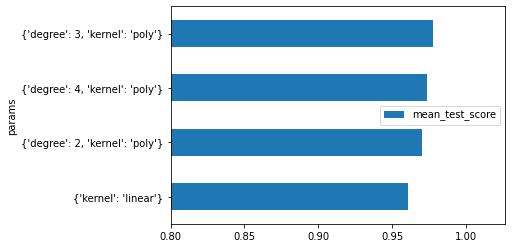

In [16]:
# visualize the result
(
    results.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)

In [ ]:
# visualize the result
#(
#    results.loc[:,['params','mean_test_score']]
#    .sort_values('mean_test_score', ascending=True)
#    .plot.barh(x='params', xlim=(0.8))
#)